In [1]:
import numpy as np
from scipy.sparse import spdiags, eye
from scipy import signal
import matplotlib.pyplot as plt
import scipy
import timeit
from scipy.linalg import solve, lu_factor, lu_solve




###### Define spatial and temporal variables

In [2]:
D=1

#space
Lx=1;Ly=1 #Diffusion constant; Domain length
Jx = 10; Jy=Jx
dx = float(Lx/(Jx-1)); dy = float(Ly/(Jy-1))
ncells = Jx*Jy
#time
T = 100
N = T*10
dt = float(T/N-1)


# dt=(dx*dy)/(2*D); #borderline stability of FTCS scheme 
alpha=dt*D/(dx*dy);


nx=Jx

###### Natural ordering: Boundary conditions

In [3]:
def no(coordinates,n=Jx):
    i=coordinates[0]
    j = coordinates[1]
    k = i + (j)*n
    return k

top  = [(0,j) for j in range(Jx)]
bottom  = [(Jx-1,j) for j in range(Jx)]
left =  [(i,0) for i in range(Jy)]
right  = [(i,Jy-1) for i in range(Jy)]
top_no = [no(top_cell) for top_cell in top]
bottom_no = [no(bottom_cell) for bottom_cell in bottom]
left_no = [no(left_cell) for left_cell in left]
right_no = [no(right_cell) for right_cell in right]

# print(bottom, bottom_no)
# print(top, top_no)
# print(left, left_no)
# print(right, right_no)
interior_no = np.linspace(0,ncells-1,ncells)
boundaries_no = top_no + bottom_no + left_no + right_no
interior_no = [int(x) for x in interior_no if x not in boundaries_no]
# interior_no

        

In [4]:
ncells = Jx*Jy
# ncells = Jx

data = np.array([-alpha*np.ones(ncells),-alpha*np.ones(ncells), 2*(1+2*alpha)*np.ones(ncells), -alpha*np.ones(ncells),-alpha*np.ones(ncells),])
diags = np.array([-Jx, -1, 0, 1, Jx])
I = eye(ncells).toarray()
A = spdiags(data, diags,ncells,ncells).toarray()
A[boundaries_no] = I[boundaries_no]


In [5]:
int(Jx/2)

5

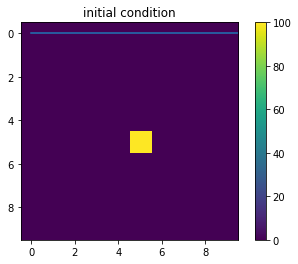

In [6]:
# sigma=Lx/1; #stedv of the gaussian - sharp gaussian as initial condition
# u = signal.gaussian(ncells,sigma)*100
# u=u.transpose()
# plt.plot(np.linspace(0,ncells,ncells),u)# xlabel('$x$','Interpreter','latex','FontSize',14);
# plt.title('initial condition')
u = np.zeros(ncells)
center_no = no((int(Jx/2),int(Jx/2)))
u[center_no] = 100
plt.plot(np.linspace(0,ncells,ncells),u)# xlabel('$x$','Interpreter','latex','FontSize',14);
plt.title('initial condition')   
u_matrix = u.reshape(Jx,Jx)
plt.imshow(u_matrix)
plt.colorbar()
u0 = u

100%|██████████| 1000/1000 [00:00<00:00, 3072.36it/s]


-0.0014508239999997397


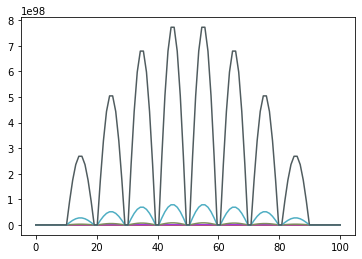

In [7]:
from scipy.linalg import lu_factor, lu_solve
from tqdm import tqdm
import plotly.express as px
luA, piv = lu_factor(A)
start = timeit.timeit()
b=[0]*ncells
def f(u):
    return 1

from random import randint
colors = []
n = 1000
for i in range(n):
    colors.append('#%06X' % randint(0, 0xFFFFFF))
    
for m in tqdm(range(N)):
    if m%10==0:
        
        plt.plot(np.linspace(0,ncells,ncells),u,label=m, color=colors[m])
    for n in interior_no:
        b[n] = 2*(1-2*alpha)*u[n] + alpha*(u[n+1] + u[n-1] + u[n+Jx] + u[n-Jx]) 
#     u = solve(A, b)
    u = scipy.linalg.lu_solve((luA,piv),b)


#     u_matrix = u.reshape(Jx,Jx)
#     print(u_matrix)
    u = scipy.linalg.lu_solve((luA,piv),b)
end = timeit.timeit()
# plt.legend()
np.linspace(0,ncells,ncells)
# plt.xlim(0,10)
print(end - start)

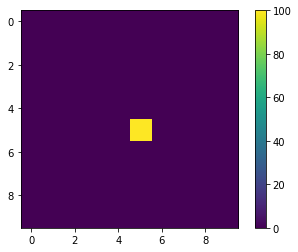

In [8]:
u0_matrix = u0.reshape(Jx,Jx)
plt.imshow(u0_matrix)
plt.colorbar()

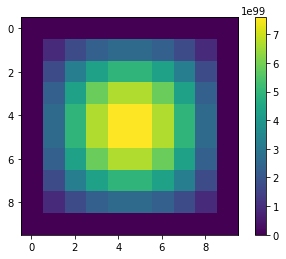

In [9]:
u_matrix = u.reshape(Jx,Jx)
plt.imshow(u_matrix)
plt.colorbar()